# **Kaggle Dataset Link** - 'https://www.kaggle.com/datasets/andrewmvd/helmet-detection'

# **Install Dependencies**

In [1]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d andrewmvd/helmet-detection

Dataset URL: https://www.kaggle.com/datasets/andrewmvd/helmet-detection
License(s): CC0-1.0
 76% 296M/391M [00:00<00:00, 908MB/s] 
100% 391M/391M [00:02<00:00, 153MB/s]


In [64]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/helmet-detection.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
!pip install -q supervision ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.4/217.4 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 53.1 MB/s eta 0:00:00


# **Import Modules**

In [65]:
# 1. Install & Setup

import os
import yaml
import supervision as sv
import shutil

import cv2
import random
import matplotlib.pyplot as plt
from ultralytics import YOLO
#from roboflow import Roboflow
import pandas as pd


# **Load The Dataset**

In [ ]:
# ==========================================================
# SETTINGS (CHANGE DATASET PATH)
# ==========================================================
# DATASET_DIR = "/content/drive/MyDrive/Datasets/helmet-detection"  # <-- CHANGE THIS
# IMG_DIR = os.path.join(DATASET_DIR, "images")
# ANN_DIR = os.path.join(DATASET_DIR, "annotations")

# FINAL_DIR = "/content/HelmetDataset"

# print("Images Path:", IMG_DIR)
# print("Annotations Path:", ANN_DIR)
# print("Output Path:", FINAL_DIR)

# # ==========================================================
# # DELETE OLD OUTPUT (OPTIONAL)
# # ==========================================================
# if os.path.exists(FINAL_DIR):
#     shutil.rmtree(FINAL_DIR)

# os.makedirs(FINAL_DIR, exist_ok=True)

In [66]:
# --- SETTINGS ---
IMG_DIR = "/content/images"
ANN_DIR = "/content/annotations"
FINAL_DIR = "/content/HelmetDataset"

if os.path.exists(FINAL_DIR):
     shutil.rmtree(FINAL_DIR)

os.makedirs(FINAL_DIR, exist_ok=True)

In [67]:
# ==========================================================
# LOAD DATASET (PASCAL VOC XML)
# ==========================================================
dataset = sv.DetectionDataset.from_pascal_voc(
    images_directory_path=IMG_DIR,
    annotations_directory_path=ANN_DIR
)

print("✅ Total Images:", len(dataset))

✅ Total Images: 764


# **Data Preprocessing**

In [68]:
# ==========================================================
# SPLIT DATASET (80/10/10)
# ==========================================================
train_dataset, remaining_dataset = dataset.split(split_ratio=0.8)
valid_dataset, test_dataset = remaining_dataset.split(split_ratio=0.5)

print("Train:", len(train_dataset))
print("Valid:", len(valid_dataset))
print("Test :", len(test_dataset))

Train: 611
Valid: 76
Test : 77


In [69]:
# ==========================================================
# EXPORT TO YOLO FORMAT
# ==========================================================
train_dataset.as_yolo(
    images_directory_path=os.path.join(FINAL_DIR, "train/images"),
    annotations_directory_path=os.path.join(FINAL_DIR, "train/labels")
)

valid_dataset.as_yolo(
    images_directory_path=os.path.join(FINAL_DIR, "valid/images"),
    annotations_directory_path=os.path.join(FINAL_DIR, "valid/labels")
)

test_dataset.as_yolo(
    images_directory_path=os.path.join(FINAL_DIR, "test/images"),
    annotations_directory_path=os.path.join(FINAL_DIR, "test/labels"),
    data_yaml_path=os.path.join(FINAL_DIR, "data.yaml")
)

print("✅ YOLO export done!")

✅ YOLO export done!


In [70]:
# FIX / OVERWRITE data.yaml FILE (FOR YOLOv8/YOLOv11)

DATA_YAML_PATH = os.path.join(FINAL_DIR, "data.yaml")

data = {
    "path": FINAL_DIR,
    "train": "train/images",
    "val": "valid/images",
    "test": "test/images",
    "nc": 2,
    "names": ["Without Helmet", "With Helmet"]
}

with open(DATA_YAML_PATH, "w") as f:
    yaml.dump(data, f)

print("\n✅ data.yaml created at:", DATA_YAML_PATH)

print(f"\n🎯 FINAL YOLO DATASET READY AT: {FINAL_DIR}")



✅ data.yaml created at: /content/HelmetDataset/data.yaml

🎯 FINAL YOLO DATASET READY AT: /content/HelmetDataset


In [15]:
# ==========================================================
# FIX data.yaml PATHS FOR YOLOv8 --> Another Process
# ==========================================================
# yaml_path = os.path.join(FINAL_DIR, "data.yaml")

# with open(yaml_path, "r") as f:
#     data_config = yaml.safe_load(f)

# data_config["train"] = "train/images"
# data_config["val"] = "valid/images"
# data_config["test"] = "test/images"

# with open(yaml_path, "w") as f:
#     yaml.dump(data_config, f)

# print("✅ data.yaml fixed!")

# print(f"\n🎯 FINAL YOLO DATASET READY AT: {FINAL_DIR}")

✅ data.yaml fixed!

🎯 FINAL YOLO DATASET READY AT: /content/HelmetDataset


In [71]:
import glob

for split in ["train", "valid", "test"]:
    img_count = len(glob.glob(os.path.join(FINAL_DIR, split, "images", "*.*")))
    lbl_count = len(glob.glob(os.path.join(FINAL_DIR, split, "labels", "*.txt")))
    print(f"{split.upper()} -> Images: {img_count} | Labels: {lbl_count}")


TRAIN -> Images: 611 | Labels: 611
VALID -> Images: 76 | Labels: 76
TEST -> Images: 77 | Labels: 77


In [20]:
# dataset.location = '/content/HelmetDataset'

In [ ]:
# import yaml

# FIXED_YAML_PATH = f"{dataset.location}/data_fixed.yaml"

# data = {
#     "path": dataset.location,
#     "train": "train/images",
#     "val": "valid/images",
#     "test": "test/images",
#     "nc": 2,
#     "names": ["With Helmet", "Without Helmet"]
# }

# with open(FIXED_YAML_PATH, "w") as f:
#     yaml.dump(data, f)

# print("✅ Fixed YAML created at:", FIXED_YAML_PATH)


In [38]:
# shutil.rmtree('/content/HelmetDataset')

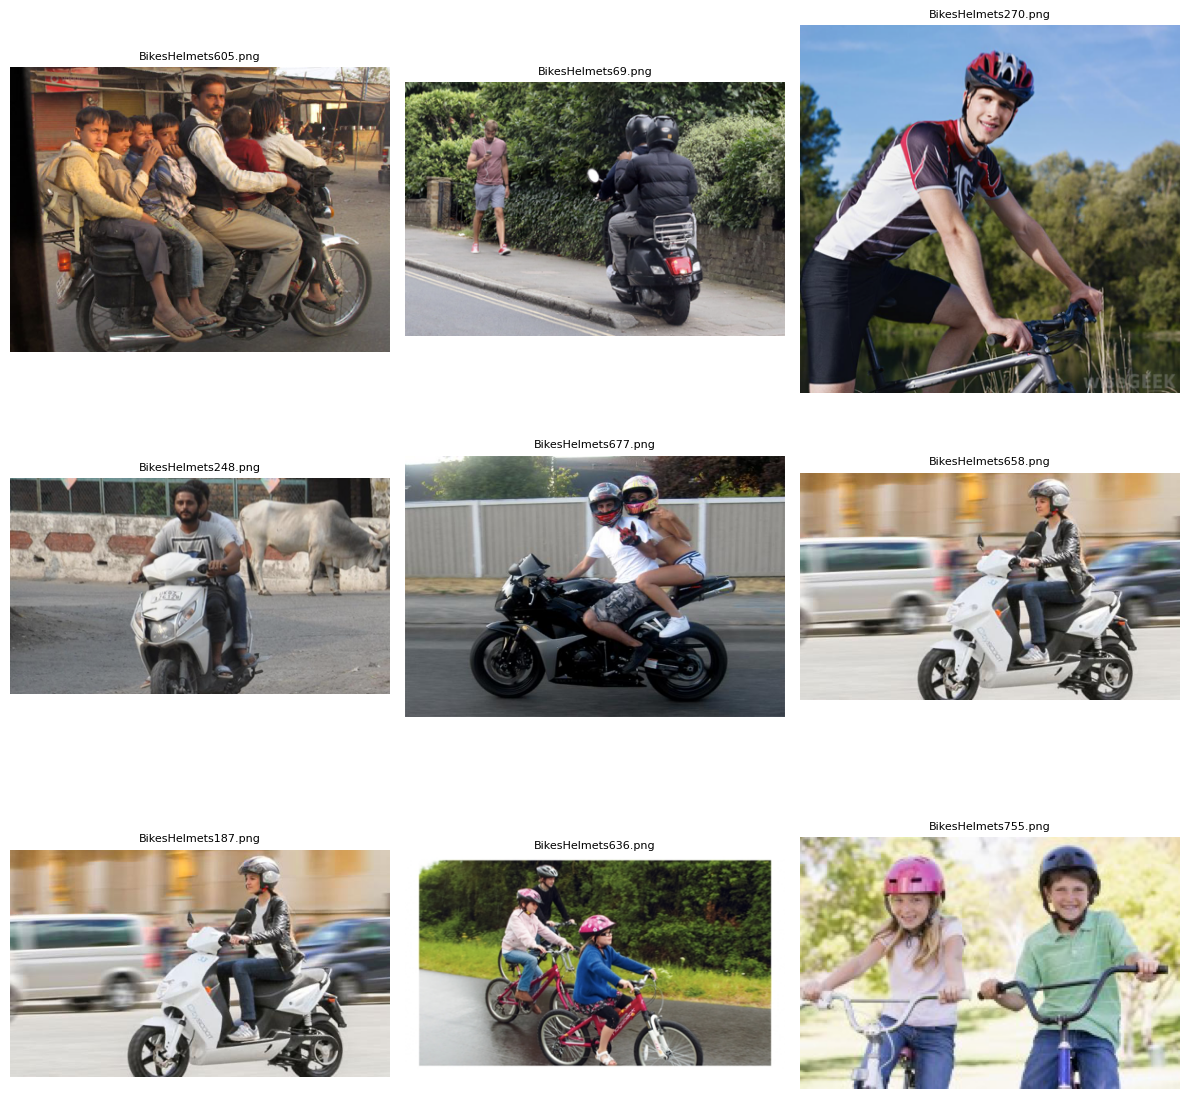

In [72]:
# Visualize Random Train Images (Before Training)

TRAIN_IMG_DIR = f'{FINAL_DIR}/train/images'

train_images = os.listdir(TRAIN_IMG_DIR)
sample_images = random.sample(train_images, 9)

plt.figure(figsize=(12, 12))

for i, image_name in enumerate(sample_images):
  image_path = os.path.join(TRAIN_IMG_DIR, image_name)

  img = cv2.imread(image_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  plt.subplot(3, 3, i+1)
  plt.imshow(img)
  plt.title(image_name, fontsize = 8)
  plt.axis('off')

plt.tight_layout()
plt.show()

# **Model Building**

In [73]:
# Load The YOLO Model

model = YOLO('yolov8n.pt')

In [74]:
# Train The YOLO Model

model.train(
    data = DATA_YAML_PATH,
    epochs = 30,
    batch = 16,
    imgsz = 640,
    name = 'train',
    exist_ok = True
)

Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/HelmetDataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=30, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspectiv

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fb4761ffce0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [75]:
# Check the Results

results_csv = "/content/runs/detect/train/results.csv"
df = pd.read_csv(results_csv)

df.head()

epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1  18.0031         1.47557         2.85026         1.21582   
1      2  32.5866         1.41115         1.83358         1.14110   
2      3  48.0746         1.38462         1.62090         1.16349   
3      4  62.9282         1.37564         1.49496         1.16541   
4      5  77.3318         1.35675         1.39122         1.14791   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.00553            0.81882           0.27513   
1               0.00726            0.52704           0.31638   
2               0.57205            0.40590           0.44829   
3               0.67842            0.62964           0.64445   
4               0.52010            0.71335           0.68871   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.16036       1.31570       3.08180       1.03962  0.000541   
1              0.18330       1.40239       3.01427       1.25643  0.001061   
2              0.25324       1.47962       2.18966       1.30389  0.001543   
3              0.38779       1.44655       1.55860       1.31125  0.001502   
4              0.39724       1.44935       1.60397       1.29481  0.001447   

     lr/pg1    lr/pg2  
0  0.000541  0.000541  
1  0.001061  0.001061  
2  0.001543  0.001543  
3  0.001502  0.001502  
4  0.001447  0.001447

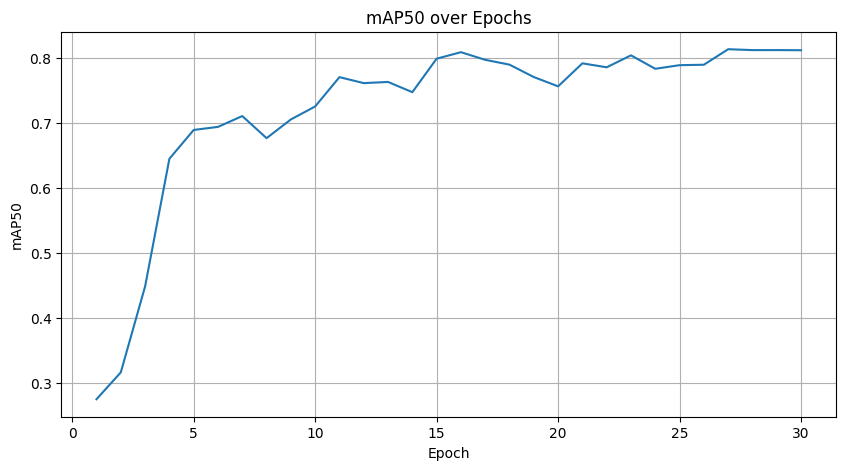

In [76]:
# PLOT TRAINING GRAPH (mAP50 over Epochs)

plt.figure(figsize=(10, 5))
plt.plot(df["epoch"], df["metrics/mAP50(B)"])
plt.title("mAP50 over Epochs")
plt.xlabel("Epoch")
plt.ylabel("mAP50")
plt.grid(True)
plt.show()

# M**odel Evaluation**

In [77]:
# LOAD BEST MODEL

BEST_MODEL_PATH = '/content/runs/detect/train/weights/best.pt'
best_model = YOLO(BEST_MODEL_PATH)

# Evaluate On Test Dataset (After Prediction)

best_model.val(
    data = DATA_YAML_PATH,
    split = 'test'
)

Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
Model summary (fused): 73 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2420.0±1484.4 MB/s, size: 493.3 KB)
val: Scanning /content/HelmetDataset/test/labels... 77 images, 0 backgrounds, 2 corrupt: 100% ━━━━━━━━━━━━ 77/77 917.4it/s 0.1s
val: /content/HelmetDataset/test/images/BikesHelmets444.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     298.99      47.994          78          80]
val: /content/HelmetDataset/test/images/BikesHelmets764.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [        219      90.997          80          82]
val: New cache created: /content/HelmetDataset/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 5/5 1.6it/s 3.1s
                   all         75        134      0.792      0.7

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fb67c2a62a0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

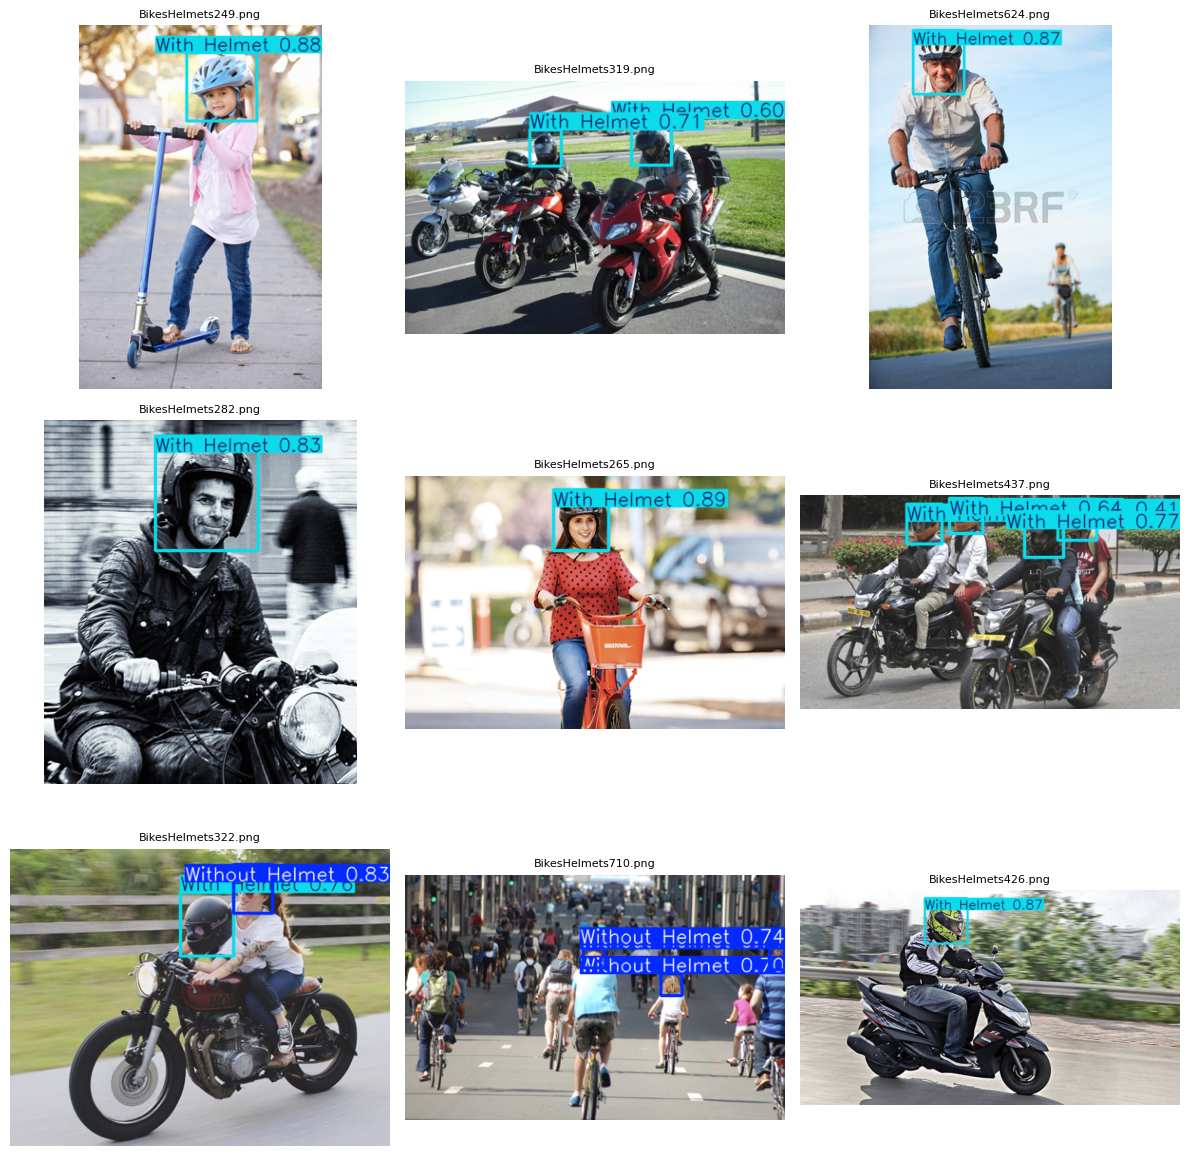

In [78]:
# VISUALIZE RANDOM TEST PREDICTIONS (AFTER TRAINING) - > Plot using yolo's result function

TEST_IMG_DIR = f'{FINAL_DIR}/test/images'

test_images = os.listdir(TEST_IMG_DIR)
sample_test_images = random.sample(test_images, 9)

plt.figure(figsize=(12, 12))

for i, image_name in enumerate(sample_test_images):
  image_path = os.path.join(TEST_IMG_DIR, image_name)

  results = best_model.predict(image_path, conf=0.4, imgsz=640, verbose=False)[0]

  annotated_img = results.plot()
  #annotated_img = results.plot(conf=True, labels=False)

  annotated_img = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

  plt.subplot(3, 3, i+1)
  plt.imshow(annotated_img)
  plt.title(image_name, fontsize=8)
  plt.axis('off')

plt.tight_layout()
plt.show()


In [79]:
# DOWNLOAD BEST MODEL (best.pt)

from google.colab import files
files.download(BEST_MODEL_PATH)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
# Webcam.py

import cv2
from ultralytics import YOLO

# ==========================================
# LOAD TRAINED MODEL
# ==========================================
MODEL_PATH = "/content/runs/detect/train/weights/best.pt"   # put best.pt in same folder
model = YOLO(MODEL_PATH)

# ==========================================
# WEBCAM START
# ==========================================
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("❌ Error: Webcam not opening")
    exit()

print("✅ Webcam started... Press Q to exit")

while True:
    ret, frame = cap.read()
    if not ret:
        print("❌ Failed to read frame")
        break

    # ==========================================
    # YOLO PREDICTION
    # ==========================================
    results = model.predict(frame, conf=0.4, imgsz=640, verbose=False)[0]

    # ==========================================
    # DRAW BOXES
    # ==========================================
    for box in results.boxes:
        x1, y1, x2, y2 = box.xyxy[0]
        conf = float(box.conf[0])
        cls_id = int(box.cls[0])

        label = model.names[cls_id]

        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

        # Draw rectangle
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Label text
        text = f"{label} {conf:.2f}"

        # Put label
        cv2.putText(frame, text, (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

    # ==========================================
    # SHOW FRAME
    # ==========================================
    cv2.imshow("Helmet Detection Webcam", frame)

    # Press Q to exit
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

# ==========================================
# RELEASE WEBCAM
# ==========================================
cap.release()
cv2.destroyAllWindows()
print("✅ Webcam closed")


❌ Error: Webcam not opening
✅ Webcam started... Press Q to exit
❌ Failed to read frame
✅ Webcam closed
